In [1]:
import json
import pickle
import os
from matplotlib import pyplot as plt
import numpy as np
from ray.tune import ExperimentAnalysis
import pandas as pd

In [2]:
analysis = ExperimentAnalysis("/global/homes/j/juikuan/ray_results/ratio")

In [17]:
best_trial = analysis.get_best_trial(metric="acc1", mode="max")
print("Best trial config: {}".format(best_trial.config))

Best trial config: {'lr': 0.011846591228078249, 'ks1_1': 25, 'ks3_1': 3, 'ks3_2': 3, 'ks4_1': 3, 'ks4_2': 3, 'batch': 16, 'ks_ratio': 0.9, 'out_ch7': 512, 'ps': 3, 'lw1': 1, 'lw2': 0.2, 'lw3': 0.005, 'w1': 128, 'w2': 512, 'w3': 256, 'rescale1': 'mean', 'rescale2': 'mean', 'rescale3': 'mean', 'LAE_w': False, 'ratio': 1, 'thres': 0.7, 'factor': 1.6}


In [ ]:
print("Best trial final validation score: {}".format(best_trial.last_result["acc1"]))

In [19]:
df = analysis.dataframe()
sorted_df = df.sort_values(by="acc1", ascending=False)
# top_10_trials = sorted_df.head(30)
# plt.hist(sorted_df[["acc1"]], bins = 30)
# plt.xlabel("acc1")
# plt.ylabel("# of trials")
# plt.show()
# print(top_10_trials[["acc1", "acc1", "config/ks1_1", "config/ks_ratio", "config/out_ch7", "config/w1"]])
sorted_df.to_csv('sample4.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = analysis.dataframe()
sns.lineplot(data = df, x="training_iteration", y = "acc1", hue = "trial_id")
plt.show()

In [ ]:
with open("/global/homes/j/juikuan/ray_results/ratio/build_model_30e03_00001_1_LAE_w=False,batch=8,factor=1.8000,ks1_1=25,ks3_1=3,ks3_2=3,ks4_1=3,ks4_2=3,ks_ratio=0.9000,lr=0.0060,lw1_2024-09-19_07-05-14/result.json", "r") as fh:
    lines = fh.readlines()
    last_json = json.loads(lines[-1])

In [ ]:
last_json

In [6]:
def plot_acc(folder, xscale = "linear", metric = "acc1"):
    performance = {}
    trials = os.listdir("../ray_results/" + folder + "/")
    with open("../ray_results/" + folder + "/" + trials[0] + "/result.json", "r") as fh:
        lines = fh.readlines()
        last_json = json.loads(lines[-1])
        check0 = last_json['config']
    with open("../ray_results/" + folder + "/" + trials[1] + "/result.json", "r") as fh:
        lines = fh.readlines()
        last_json = json.loads(lines[-1])
        check1 = last_json['config']
        
    for i in check0.keys():
        if check0[i] != check1[i]:
            hyper = i
            break
        else:
            pass
    hyper = "ratio"
    for i in os.listdir("../ray_results/" + folder + "/"):
        if "json" not in i and "pkl" not in i and i[0] != ".":
            with open("../ray_results/" + folder + "/" + i + "/result.json", "r") as fh:
                lines = fh.readlines()
                last_json = json.loads(lines[-1])
                if last_json['config'][hyper] in performance:
                    performance[last_json['config'][hyper]].append(last_json[metric])
                else:
                    performance[last_json['config'][hyper]] = [last_json[metric]]

    means = []
    stds = []
    a = list(performance.keys())
    a.sort()
    for i in a:
        means.append(np.mean(performance[i]))
        stds.append(np.std(performance[i]))
        
    if xscale == "log10":
        a = np.log10(a)
    elif xscale == "log2":
        a = np.log2(a)
    elif xscale == "linear":
        pass
    
    plt.close()
    plt.errorbar(x = a, y = means, yerr = stds, capsize = 3, ls = "", ms = 10, marker = ".", mfc = "r")
    plt.xlabel(hyper)
    plt.ylabel("Accuracy")
    plt.show()
        
    return performance

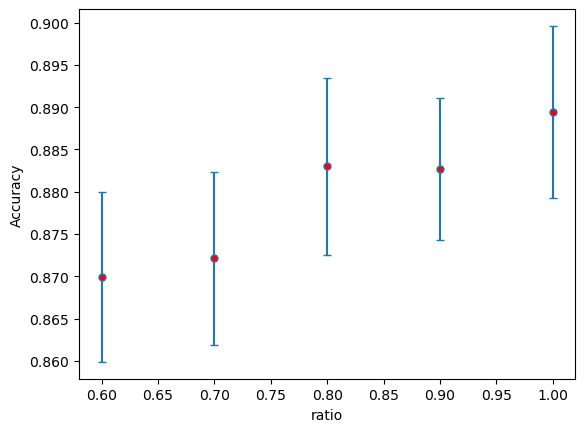

In [9]:
a = plot_acc(folder = "ratio", xscale = "linear", metric = "acc1")

In [12]:
for i in b.keys():
    a[i] = b[i]

In [23]:
c = list(a.keys())
c.sort()
means = []
stds = []
for i in c:
    means.append(np.mean(a[i]))
    stds.append(np.std(a[i], ddof = 1))

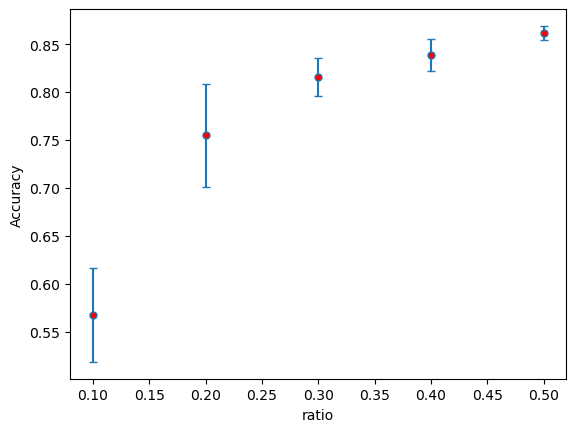

In [10]:
b = plot_acc(folder = "ratio(2)", xscale = "linear", metric = "acc1")

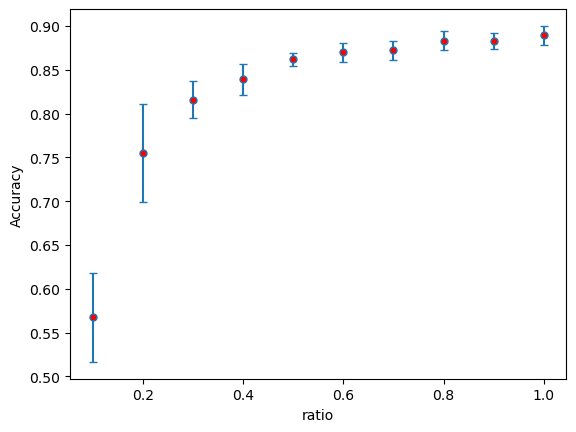

In [24]:
plt.close()
plt.errorbar(x = c, y = means, yerr = stds, capsize = 3, ls = "", ms = 10, marker = ".", mfc = "r")
plt.xlabel("ratio")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
with open("../ray_results/ratio/result.json", "r") as fh:
    lines = fh.readlines()
    last_json1 = json.loads(lines[-1])
    
with open("../ray_results/ratio(2)/result.json", "r") as fh:
    lines = fh.readlines()
    last_json2 = json.loads(lines[-1])
    
    